In [ ]:
##### Rain intensity #####

In [ ]:
# First run the library, setting directory, load in data, and time column cells for one region to make the figures for a specific region.
# In the last cell of this code, you can find the coordinates of Raichur and Chikkaballapur and copy and paste the ones you need for the plots.

In [31]:
##### Import libraries #####
import imdlib as imd
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import calendar
from calendar import isleap
from calendar import month_abbr
from scipy.stats import linregress
from scipy.stats import ttest_ind

In [32]:
##### Setting directory ######
# os.chdir("C:/..../")  # Set to own working directory with the csv you want to use in it
os.chdir("C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/")

In [41]:
##### Load in rainfall data of the region #####
# Check whether the csv you want to use is in the working directory set before
Raichur = pd.read_csv("clipped_raichur_rain (1).csv", delimiter=",")  # Use delimiter for comma separated data
Chikkaballapur = pd.read_csv("clipped_chikkaballapur_rain_5_points.csv", delimiter=",") 

# Choose between Raichur and Chikkaballapur
rain_region = Chikkaballapur # change this to the region (Raichur or Chikkaballapur) you want to get results for in the next cells
region = 'Chikkaballapur' # change this to the region (Raichur or Chikkaballapur) you want to get results for in the next cells
display(rain_region) # displays first and last rows of the data

# Available coordinates for Raichur: (16.25, 76.5), (16.25, 76.75), (16.25, 77), (16.5, 76.5), (16.5, 76.75), (16.5, 77)
# Available coordinates for Chikkaballapur: (13.5, 77.5), (13.5, 77.75), (13.5, 78), (13.75, 77.75), (13.75, 78)

,lat,lon,time,spatial_ref,rain
0,13.50,77.5,1/1/1901,0,0.000000
1,13.50,77.5,1/2/1901,0,0.000000
2,13.50,77.5,1/3/1901,0,0.000000
3,13.50,77.5,1/4/1901,0,0.000000
4,13.50,77.5,1/5/1901,0,0.000000
...,...,...,...,...,...
226450,13.75,78.0,12/27/2024,0,13.719415
226451,13.75,78.0,12/28/2024,0,7.478406
226452,13.75,78.0,12/29/2024,0,0.000000
226453,13.75,78.0,12/30/2024,0,0.000000


In [42]:
# Make sure that time column is read as date_time in python
# Convert 'time' column to a datetime object with automatic format inference
rain_region["date_time"] = pd.to_datetime(rain_region["time"], errors='coerce') # this step converts the time column to the readable date_time column for python
# errors statement: this will handle any values that don't match the format
# display(rain_region) # another column is added with the format of date_time for the data
# rain_region["date_time"] # shows the column of the date_time

# Set date_time as the index (index is first column as the sort of number of rows)
rain_region.set_index("date_time", inplace=True)     # True if you want it set as an index
rain_region['year'] = rain_region.index.year
rain_region['month'] = rain_region.index.month
rain_region['day'] = rain_region.index.day

# rain_region["rain"] # checking the type of the rain data (float)
# del rain_region["time"] # dont need the time column anymore
rain_region


,lat,lon,time,spatial_ref,rain,year,month,day
date_time,,,,,,,,
1901-01-01,13.50,77.5,1/1/1901,0,0.000000,1901,1,1
1901-01-02,13.50,77.5,1/2/1901,0,0.000000,1901,1,2
1901-01-03,13.50,77.5,1/3/1901,0,0.000000,1901,1,3
1901-01-04,13.50,77.5,1/4/1901,0,0.000000,1901,1,4
1901-01-05,13.50,77.5,1/5/1901,0,0.000000,1901,1,5
...,...,...,...,...,...,...,...,...
2024-12-27,13.75,78.0,12/27/2024,0,13.719415,2024,12,27
2024-12-28,13.75,78.0,12/28/2024,0,7.478406,2024,12,28
2024-12-29,13.75,78.0,12/29/2024,0,0.000000,2024,12,29


In [ ]:
##### Rainfall intensity plots used in the report #####


Linear Regression Results for Chikkaballapur:
Slope (trend per year):     0.0122 mm/day/year
Intercept:                 -10.4148
R² (coefficient of determination): 0.0368
P-value:                   0.032886
Standard error:            0.0056


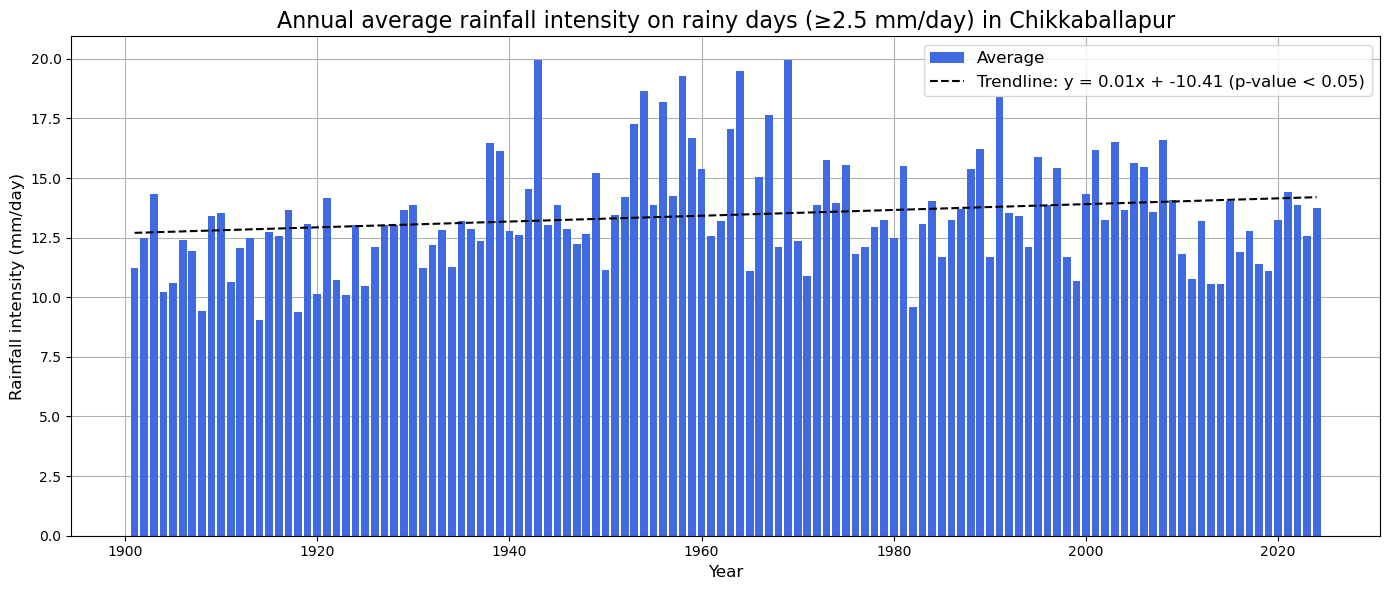

In [43]:
## Annual average rainfall intensity on rainy days (≥2.5 mm/day) in the region, averaged over all stations + linear regression

# Define region and coordinates
region = 'Chikkaballapur'  # "Raichur" or "Chikkaballapur"
#region_coords = [ 
#(16.25, 76.5), (16.25, 76.75), (16.25, 77),
#   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
#]                                             # Raichur coordinates

region_coords = [           
    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
    (13.75, 77.75), (13.75, 78)
]                                             # Chikkaballapur coordinates
# Filter region data
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
].copy()

# Convert date and extract year
region_data['date'] = pd.to_datetime(region_data['time'])
region_data['year'] = region_data['date'].dt.year

# Group by date, lat, lon to get daily totals
daily_rain = region_data.groupby(['year', 'date', 'lat', 'lon'])['rain'].sum().reset_index()

# Define rainy days as days with ≥2.5 mm
rainy_days = daily_rain[daily_rain['rain'] >= 2.5]

# Count rainy days per station per year
rainy_day_counts = rainy_days.groupby(['year', 'lat', 'lon']).size().reset_index(name='rainy_days')

# Total rain on rainy days per station per year
total_rain_on_rainy_days = rainy_days.groupby(['year', 'lat', 'lon'])['rain'].sum().reset_index(name='total_rain')

# Merge and compute rainfall intensity
rain_stats = pd.merge(total_rain_on_rainy_days, rainy_day_counts, on=['year', 'lat', 'lon'])
rain_stats['intensity'] = rain_stats['total_rain'] / rain_stats['rainy_days']

# Average intensity across stations per year
mean_intensity_per_year = rain_stats.groupby('year')['intensity'].mean()
years = mean_intensity_per_year.index.values
intensity_values = mean_intensity_per_year.values

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, intensity_values)

# Print regression statistics
print(f"\nLinear Regression Results for {region}:")
print(f"Slope (trend per year):     {slope:.4f} mm/day/year")
print(f"Intercept:                 {intercept:.4f}")
print(f"R² (coefficient of determination): {r_value**2:.4f}")
print(f"P-value:                   {p_value:.6f}")
print(f"Standard error:            {std_err:.4f}")

# Smart p-value formatting
if p_value < 0.01:
    p_str = "p-value ≪ 0.05"
elif p_value < 0.05:
    p_str = "p-value < 0.05"
else:
    p_str = f"p-value = {p_value:.3f}"

# Create trendline label
trend_label = f"Trendline: y = {slope:.2f}x + {intercept:.2f} ({p_str})"

# Plot settings
plt.figure(figsize=(14, 6))

# Grid behind bars and lines
plt.grid(True, zorder=0)

# Plot bars and trendline with correct z-order
bar = plt.bar(years, intensity_values, color='royalblue', label='Average', zorder=2)
line, = plt.plot(years, slope * years + intercept, color='black', linestyle='--',
                 label=trend_label, zorder=3)

# Title and labels
plt.title(f"Annual average rainfall intensity on rainy days (≥2.5 mm/day) in {region}", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rainfall intensity (mm/day)", fontsize=12)

# Custom legend order: bar first, then trendline
plt.legend(handles=[bar, line], fontsize=12)

plt.tight_layout()

# Save figure
output_folder = r"C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/Figures"
filename = f"annual_average_rainfall_intensity_2.5mmday_{region.lower()}.png"
output_path = os.path.join(output_folder, filename)
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

T-TEST COMPARISON OF RAIN INTENSITY (≥2.5 mm/day) in Chikkaballapur
Month  Mean_1901–30  Mean_1995–24  Diff (mm)  p-value Significant?
  Jan          7.73          7.01      -0.72   0.6467           No
  Feb          8.89          9.72       0.83   0.6939           No
  Mar         10.17          9.74      -0.43   0.8137           No
  Apr         10.02         11.60       1.58   0.1865           No
  May         10.85         14.09       3.24   0.0064          Yes
  Jun         10.46         12.44       1.98   0.0900           No
  Jul          9.88         10.52       0.65   0.5383           No
  Aug          9.63         12.59       2.96   0.0042          Yes
  Sep         15.05         15.02      -0.04   0.9734           No
  Oct         12.75         14.05       1.29   0.3138           No
  Nov         11.32         10.63      -0.69   0.6079           No
  Dec          7.53          8.73       1.20   0.3805           No


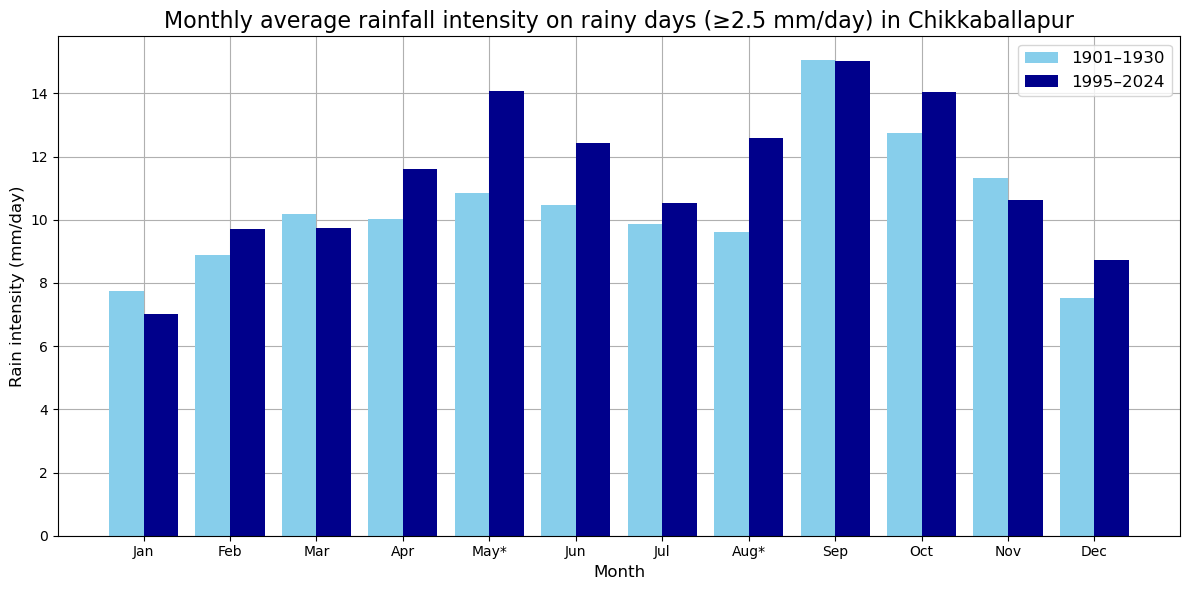

In [56]:
## Rainfall intensity per month shown (rain per rainy day ≥2.5 mm) comparison between periods + statistical test

# Define region and coordinates
region = 'Chikkaballapur'  # "Raichur" or "Chikkaballapur"
#region_coords = [ 
#(16.25, 76.5), (16.25, 76.75), (16.25, 77),
#   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
#]                                             # Raichur coordinates

region_coords = [           
    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
    (13.75, 77.75), (13.75, 78)
]                                             # Chikkaballapur coordinates

# Filter region data
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
].copy()

# Convert time column to datetime and extract year/month
region_data['date'] = pd.to_datetime(region_data['time'])
region_data['year'] = region_data['date'].dt.year
region_data['month'] = region_data['date'].dt.month

# Group by date, lat, lon and sum rain to get daily rain
daily_rain = region_data.groupby(['year', 'month', 'date', 'lat', 'lon'])['rain'].sum().reset_index()

# Filter for rainy days ≥ 2.5 mm
rainy_days = daily_rain[daily_rain['rain'] >= 2.5]

# Monthly totals and rainy day counts
monthly_rain = rainy_days.groupby(['year', 'month', 'lat', 'lon'])['rain'].sum().reset_index()
rainy_day_counts = rainy_days.groupby(['year', 'month', 'lat', 'lon']).size().reset_index(name='rainy_days')

# Merge and calculate rain intensity
monthly_data = pd.merge(monthly_rain, rainy_day_counts, on=['year', 'month', 'lat', 'lon'])
monthly_data['rain_intensity'] = monthly_data['rain'] / monthly_data['rainy_days']

# Average over all stations for each (year, month)
monthly_avg = monthly_data.groupby(['year', 'month'])['rain_intensity'].mean().reset_index()

# Split into two periods
period1 = monthly_avg[(monthly_avg['year'] >= 1901) & (monthly_avg['year'] <= 1930)]
period2 = monthly_avg[(monthly_avg['year'] >= 1995) & (monthly_avg['year'] <= 2024)]

# Prepare for t-test and summary table
summary_data = []
for month in range(1, 13):
    p1_vals = period1[period1['month'] == month]['rain_intensity']
    p2_vals = period2[period2['month'] == month]['rain_intensity']
    
    mean1 = p1_vals.mean()
    mean2 = p2_vals.mean()
    diff = mean2 - mean1
    
    t_stat, p_val = ttest_ind(p1_vals, p2_vals, equal_var=False, nan_policy='omit')
    significant = "Yes" if p_val < 0.05 else "No"
    
    summary_data.append([calendar.month_abbr[month], round(mean1, 2), round(mean2, 2), round(diff, 2), round(p_val, 4), significant])

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data, columns=[
    'Month', 'Mean_1901–30', 'Mean_1995–24', 'Diff (mm)', 'p-value', 'Significant?'
])

# Print summary table
print(f"T-TEST COMPARISON OF RAIN INTENSITY (≥2.5 mm/day) in {region}")
print(summary_df.to_string(index=False))

# Plot comparison 
monthly_avg_p1 = period1.groupby('month')['rain_intensity'].mean()
monthly_avg_p2 = period2.groupby('month')['rain_intensity'].mean()

x = np.arange(1, 13)
bar_width = 0.4

# Identify significant months
significant_months = summary_df[summary_df['Significant?'] == "Yes"]['Month'].tolist()

# Generate month labels with * for significant months
month_labels = [
    f"{calendar.month_abbr[m]}*" if calendar.month_abbr[m] in significant_months else calendar.month_abbr[m]
    for m in x
]

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - bar_width/2, monthly_avg_p1.values, width=bar_width, label='1901–1930', color='skyblue', zorder=2)
bars2 = plt.bar(x + bar_width/2, monthly_avg_p2.values, width=bar_width, label='1995–2024', color='darkblue', zorder=2)
plt.xticks(x, month_labels)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Rain intensity (mm/day)", fontsize=12)
plt.title(f"Monthly average rainfall intensity on rainy days (≥2.5 mm/day) in {region}", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, zorder=0)
plt.tight_layout()

# Save figure
output_folder = r"C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/Figures"
filename = f"monthly_average_rainfall_intensity_2.5mmday_{region.lower()}.png"
output_path = os.path.join(output_folder, filename)
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Plot figure
plt.show()


In [9]:
###### Extra rainfall intensity scripts #####


Linear Regression Results for Chikkaballapur:
Slope (trend per year):     -0.0002 mm/day/year
Intercept:                 2.1815
R² (coefficient of determination): 0.0002
P-value:                   0.869126
Standard error:            0.0012


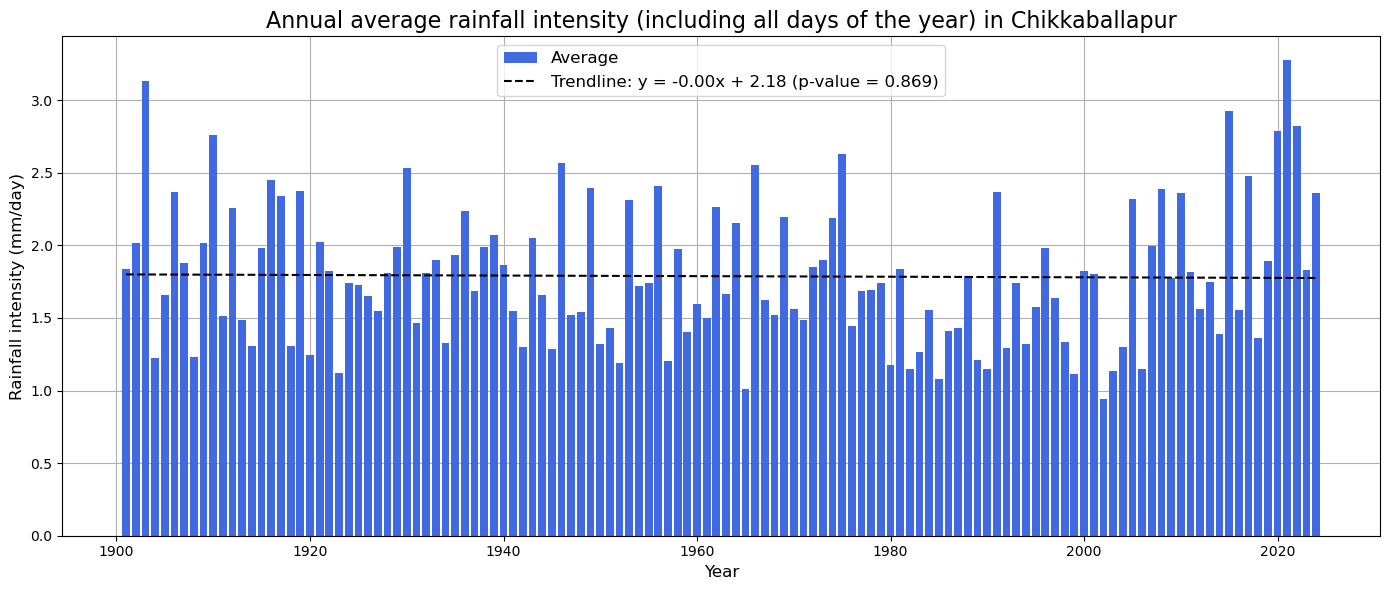

In [25]:
## Annual average rainfall intensity (including all days of the year, also days with no rain) in the region, averaged over all stations + linear regression

# Define region and coordinates
region = 'Chikkaballapur'  # "Raichur" or "Chikkaballapur"
#region_coords = [ 
#(16.25, 76.5), (16.25, 76.75), (16.25, 77),
#   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
#]                                             # Raichur coordinates

region_coords = [           
    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
    (13.75, 77.75), (13.75, 78)
]                                             # Chikkaballapur coordinates
# Filter region data
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
].copy()

# Convert date and extract year
region_data['date'] = pd.to_datetime(region_data['time'])
region_data['year'] = region_data['date'].dt.year

# Group by year, date, lat, lon to get daily totals (rain per day per station)
daily_rain = region_data.groupby(['year', 'date', 'lat', 'lon'])['rain'].sum().reset_index()

# Count all days per year per station (including dry days, rain ≥ 0)
all_day_counts = daily_rain.groupby(['year', 'lat', 'lon']).size().reset_index(name='all_days')

# Total rain per year per station (including zeros)
total_rain_per_year = daily_rain.groupby(['year', 'lat', 'lon'])['rain'].sum().reset_index(name='total_rain')

# Merge counts and totals
rain_stats = pd.merge(total_rain_per_year, all_day_counts, on=['year', 'lat', 'lon'])

# Compute intensity as total rain / total days (including dry days)
rain_stats['intensity'] = rain_stats['total_rain'] / rain_stats['all_days']

# Average intensity across stations per year
mean_intensity_per_year = rain_stats.groupby('year')['intensity'].mean()

# Extract year and intensity values if needed
years = mean_intensity_per_year.index.values
intensity_values = mean_intensity_per_year.values

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, intensity_values)

# Print regression statistics
print(f"\nLinear Regression Results for {region}:")
print(f"Slope (trend per year):     {slope:.4f} mm/day/year")
print(f"Intercept:                 {intercept:.4f}")
print(f"R² (coefficient of determination): {r_value**2:.4f}")
print(f"P-value:                   {p_value:.6f}")
print(f"Standard error:            {std_err:.4f}")

# Smart p-value formatting
if p_value < 0.01:
    p_str = "p-value ≪ 0.05"
elif p_value < 0.05:
    p_str = "p-value < 0.05"
else:
    p_str = f"p-value = {p_value:.3f}"

# Create trendline label
trend_label = f"Trendline: y = {slope:.2f}x + {intercept:.2f} ({p_str})"

# Plot settings
plt.figure(figsize=(14, 6))

# Grid behind bars and lines
plt.grid(True, zorder=0)

# Plot bars and trendline with correct z-order
bar = plt.bar(years, intensity_values, color='royalblue', label='Average', zorder=2)
line, = plt.plot(years, slope * years + intercept, color='black', linestyle='--',
                 label=trend_label, zorder=3)

# Title and labels
plt.title(f"Annual average rainfall intensity (including all days of the year) in {region}", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rainfall intensity (mm/day)", fontsize=12)

# Custom legend order: bar first, then trendline
plt.legend(handles=[bar, line], fontsize=12)

plt.tight_layout()

# Save figure
output_folder = r"C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/Figures"
filename = f"annual_average_rainfall_intensity_0.0mmday_{region.lower()}.png"
output_path = os.path.join(output_folder, filename)
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()


T-TEST COMPARISON OF RAIN INTENSITY (>0.0 mm/day) in Chikkaballapur
Month  Mean_1901–30  Mean_1995–24  Diff (mm)  p-value Significant?
  Jan          0.32          0.05      -0.27   0.0030          Yes
  Feb          0.23          0.15      -0.07   0.4872           No
  Mar          0.30          0.40       0.11   0.4861           No
  Apr          1.05          0.92      -0.13   0.5509           No
  May          2.23          2.30       0.07   0.8326           No
  Jun          1.81          2.46       0.65   0.0460          Yes
  Jul          2.55          2.53      -0.02   0.9617           No
  Aug          2.66          3.10       0.44   0.3661           No
  Sep          5.05          4.20      -0.85   0.1295           No
  Oct          3.47          3.89       0.42   0.4641           No
  Nov          2.43          1.94      -0.49   0.4508           No
  Dec          0.39          0.54       0.15   0.4153           No


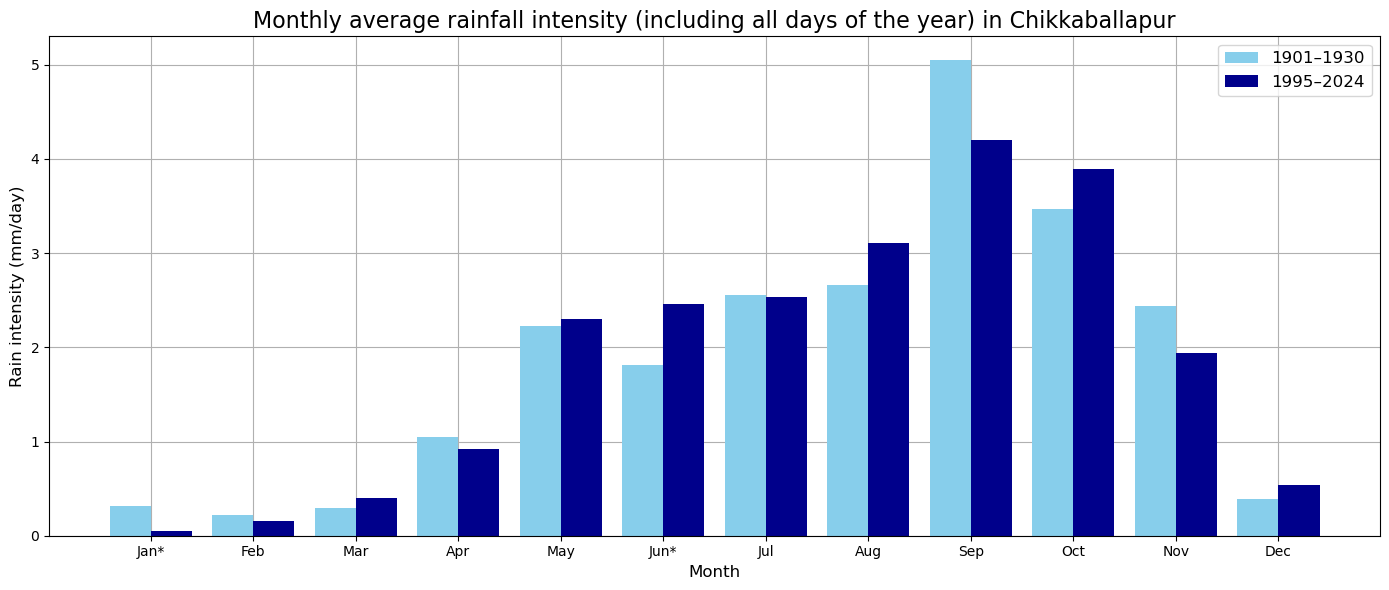

In [27]:
## Rainfall intensity per month shown (including all days of the year, also days with no rain) comparison between periods + statistical test

# Define region and coordinates
region = 'Chikkaballapur'  # "Raichur" or "Chikkaballapur"
#region_coords = [ 
#(16.25, 76.5), (16.25, 76.75), (16.25, 77),
#   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
#]                                             # Raichur coordinates

region_coords = [           
    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
    (13.75, 77.75), (13.75, 78)
]                                             # Chikkaballapur coordinates

# Filter region data (same)
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
].copy()

# Convert time column to datetime and extract year/month
region_data['date'] = pd.to_datetime(region_data['time'])
region_data['year'] = region_data['date'].dt.year
region_data['month'] = region_data['date'].dt.month

# Group by year, month, date, lat, lon and sum rain to get daily total rain per station
daily_rain = region_data.groupby(['year', 'month', 'date', 'lat', 'lon'])['rain'].sum().reset_index()

# Count all days per month per station (including dry days with rain=0)
all_days_counts = daily_rain.groupby(['year', 'month', 'lat', 'lon']).size().reset_index(name='all_days')

# Sum total rain per month per station (including dry days with rain=0)
monthly_rain = daily_rain.groupby(['year', 'month', 'lat', 'lon'])['rain'].sum().reset_index(name='total_rain')

# Merge to get both total rain and count of all days per month/station
monthly_data = pd.merge(monthly_rain, all_days_counts, on=['year', 'month', 'lat', 'lon'])

# Calculate monthly rain intensity as total rain / all days in the month (including dry days)
monthly_data['rain_intensity'] = monthly_data['total_rain'] / monthly_data['all_days']

# Average over all stations for each (year, month)
monthly_avg = monthly_data.groupby(['year', 'month'])['rain_intensity'].mean().reset_index()

# Split into two periods for comparison
period1 = monthly_avg[(monthly_avg['year'] >= 1901) & (monthly_avg['year'] <= 1930)]
period2 = monthly_avg[(monthly_avg['year'] >= 1995) & (monthly_avg['year'] <= 2024)]

# Prepare for t-test and summary table
summary_data = []
for month in range(1, 13):
    p1_vals = period1[period1['month'] == month]['rain_intensity']
    p2_vals = period2[period2['month'] == month]['rain_intensity']
    
    mean1 = p1_vals.mean()
    mean2 = p2_vals.mean()
    diff = mean2 - mean1
    
    t_stat, p_val = ttest_ind(p1_vals, p2_vals, equal_var=False, nan_policy='omit')
    significant = "Yes" if p_val < 0.05 else "No"
    
    summary_data.append([calendar.month_abbr[month], round(mean1, 2), round(mean2, 2), round(diff, 2), round(p_val, 4), significant])

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data, columns=[
    'Month', 'Mean_1901–30', 'Mean_1995–24', 'Diff (mm)', 'p-value', 'Significant?'
])

print(f"T-TEST COMPARISON OF RAIN INTENSITY (>0.0 mm/day) in {region}")
print(summary_df.to_string(index=False))

# Plot comparison
monthly_avg_p1 = period1.groupby('month')['rain_intensity'].mean()
monthly_avg_p2 = period2.groupby('month')['rain_intensity'].mean()

x = np.arange(1, 13)
bar_width = 0.4

# Identify significant months
significant_months = summary_df[summary_df['Significant?'] == "Yes"]['Month'].tolist()

# Generate month labels with * for significant months
month_labels = [
    f"{calendar.month_abbr[m]}*" if calendar.month_abbr[m] in significant_months else calendar.month_abbr[m]
    for m in x
]

# Plot settings
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width/2, monthly_avg_p1.values, width=bar_width, label='1901–1930', color='skyblue', zorder=2)
plt.bar(x + bar_width/2, monthly_avg_p2.values, width=bar_width, label='1995–2024', color='darkblue', zorder=2)
plt.xticks(x, month_labels)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Rain intensity (mm/day)", fontsize=12)
plt.title(f"Monthly average rainfall intensity (including all days of the year) in {region}", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, zorder=0)
plt.tight_layout()

# Save figure
output_folder = r"C:/Users/Monie/OneDrive - Wageningen University & Research/Design of Climate Change Mitigation and Adaptation Strategies/Data scripts total rain and rain intensity/Figures"
filename = f"monthly_average_rainfall_intensity_0mmday_{region.lower()}.png"
output_path = os.path.join(output_folder, filename)
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show figure
plt.show()


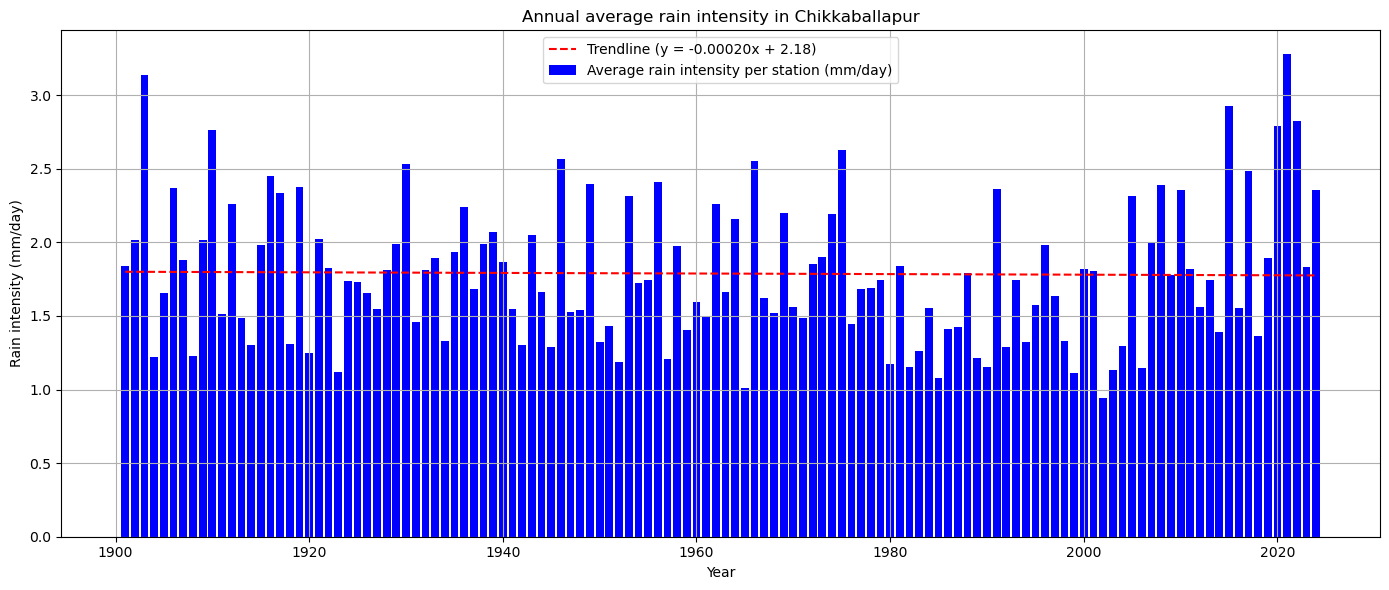


LINEAR REGRESSION ON RAIN INTENSITY (Chikkaballapur):
  Slope: -0.00020 mm/day/year
  Intercept: 2.18
  R²: 0.0002
  p-value: 0.8691
  Std Error: 0.00122


In [57]:


# Define your region coordinates
region = 'Chikkaballapur'
region_coords = [           
    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
    (13.75, 77.75), (13.75, 78)
]

# Filter data for region_coords
region_data = rain_region[
    rain_region.apply(lambda row: (row['lat'], row['lon']) in region_coords, axis=1)
].copy()

rain_region['year'] = rain_region.index.year

# Now group by year, lat, lon and sum rain
annual_precip = region_data.groupby(['year', 'lat', 'lon'])['rain'].sum().reset_index()

# Add days per year accounting for leap years
annual_precip['days'] = annual_precip['year'].apply(lambda y: 366 if isleap(y) else 365)

# Calculate rain intensity (mm/day)
annual_precip['intensity'] = annual_precip['rain'] / annual_precip['days']

# Average intensity across all stations per year
mean_intensity_per_year = annual_precip.groupby('year')['intensity'].mean()

# Trendline
years = mean_intensity_per_year.index.astype(int)
intensity_values = mean_intensity_per_year.values
z = np.polyfit(years, intensity_values, 1)
p = np.poly1d(z)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(years, intensity_values, label="Average rain intensity per station (mm/day)", color='blue')
plt.plot(years, p(years), label=f'Trendline (y = {z[0]:.5f}x + {z[1]:.2f})', color='red', linestyle='--')

plt.xlabel("Year")
plt.ylabel("Rain intensity (mm/day)")
plt.title(f"Annual average rain intensity in {region}")
plt.legend()
plt.grid(True, zorder=0)
plt.tight_layout()
plt.show()

# Linear regression stats
slope, intercept, r_value, p_value, std_err = stats.linregress(years, intensity_values)

print(f"\nLINEAR REGRESSION ON RAIN INTENSITY ({region}):")
print(f"  Slope: {slope:.5f} mm/day/year")
print(f"  Intercept: {intercept:.2f}")
print(f"  R²: {r_value**2:.4f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Std Error: {std_err:.5f}")


In [ ]:
##### Coordinates Raichur and Chikkaballapur #####

In [ ]:
########## Do not run this code, only copy the parts for the coordinates you need ###########
#### Raichur coordinates
region = 'Raichur'  # "Raichur" or "Chikkaballapur"
region_coords = [ 
(16.25, 76.5), (16.25, 76.75), (16.25, 77),
   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
]                                             # Raichur coordinates

#region_coords = [           
#    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
#    (13.75, 77.75), (13.75, 78)
#]                                             # Chikkaballapur coordinates

#### Chikkaballapur coordinates
region = 'Chikkaballapur'  # "Raichur" or "Chikkaballapur"
#region_coords = [ 
#(16.25, 76.5), (16.25, 76.75), (16.25, 77),
#   (16.5, 76.5), (16.5, 76.75), (16.5, 77)
#]                                             # Raichur coordinates

region_coords = [           
    (13.5, 77.5), (13.5, 77.75), (13.5, 78),
    (13.75, 77.75), (13.75, 78)
]                                             # Chikkaballapur coordinates
